# Ensembling vgg16-Resnet50



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

**Load images**

In [2]:
# jpg image path
images = r"D:\Final Year Project\JPG Dataset"

In [3]:
folders = os.listdir(images)
print(folders)

['Control', 'PD']


In [4]:
import cv2

im = cv2.imread(r"D:\Final Year Project\JPG Dataset\Control\2.jpg")
print(im.shape)

(512, 512, 3)


In [5]:
image_data = []
labels = []

In [6]:
label_dict = {
    'Control':0,
    'PD':1
}

In [7]:
from keras.preprocessing import image
try :

    for ix in folders:
        try :
            
            path = os.path.join(images,ix)
            for im in os.listdir(path):
                try :
                        
                    img = image.load_img(os.path.join(path,im),target_size = ((64,64)))
                    img_array = image.img_to_array(img)
                    image_data.append(img_array)
                    labels.append(label_dict[ix])
                except :
                  print("Error for processing one image.")

        except:
          print("Error in folder.")

except :
  print("Done processing images.")

Error for processing one image.


In [8]:
print(len(image_data),len(labels))

31435 31435


In [9]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [10]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(31435, 64, 64, 3) (31435,)


In [12]:
from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(31435, 64, 64, 3) (31435, 2)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

**Data augmentation**

In [14]:
augment = ImageDataGenerator( 
    
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

**Deep Ensemble CNN**

VGG16 and Resnet50-Average Layer

In [16]:
model = VGG16(include_top = False,weights = 'imagenet',input_shape = (64,64,3))

In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
for ix in range(len(model.layers)):
    print(ix,model.layers[ix])

0 <keras.src.engine.input_layer.InputLayer object at 0x000001A8502097D0>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A8B3858850>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A8B3835BD0>
3 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A8B38B7ED0>
4 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A8B38B5710>
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A8B38EFFD0>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A8B38B6A10>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910A805D0>
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910A81DD0>
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910A82BD0>
10 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A910A88E50>
11 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A851D6B110>
12 <keras.src.layers.convolutional.conv2d.Conv

**Fine-Tuninng**

In [19]:
for layer in model.layers[:16]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [20]:
av1 = Flatten()(model.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_vgg = Model(model.input,fc3)
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [22]:
model1 = ResNet50(include_top=False, input_shape=(64,64,3), weights='imagenet')

In [23]:
model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [24]:
for ix in range(len(model1.layers)):
    print(ix,model1.layers[ix])

0 <keras.src.engine.input_layer.InputLayer object at 0x000001A8B38D1E50>
1 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000001A910A81C90>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910AF0410>
3 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x000001A8B3873D90>
4 <keras.src.layers.core.activation.Activation object at 0x000001A8B38D26D0>
5 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000001A84F6D7E50>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001A910ABED90>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910B23750>
8 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x000001A910B21FD0>
9 <keras.src.layers.core.activation.Activation object at 0x000001A910B203D0>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001A910AF13D0>
11 <keras.src.layers.normalization.batch_normalization.BatchNormaliza

**Fine-Tuning**

In [25]:
for layer in model1.layers[:169]:
    layer.trainable = False
for i, layer in enumerate(model1.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [26]:
av1 = Flatten()(model1.output)
fc1 = Dense(256,activation='relu',kernel_regularizer= l2(0.01),input_dim=256)(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128,activation='relu',kernel_regularizer= l2(0.01),input_dim=128)(d1)
d2 = Dropout(0.5)(fc2)
fc3 = Dense(2,activation = 'sigmoid')(d2)


model_R = Model(model1.input,fc3)
model_R.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

**Average-Layer**

In [27]:
import tensorflow as tf
models = [model_R,model_vgg]
model_input = tf.keras.Input(shape=(64,64, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.models.Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [28]:
ensemble_model.summary()

Model: "ensemble"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 model_1 (Functional)        (None, 2)                    2571827   ['input_3[0][0]']             
                                                          4                                       
                                                                                                  
 model (Functional)          (None, 2)                    1527238   ['input_3[0][0]']             
                                                          6                                       
                                                                                           

In [29]:
adam = Adam(learning_rate=0.0001)
ensemble_model.compile(loss='categorical_crossentropy',optimizer = adam,metrics=['accuracy'])

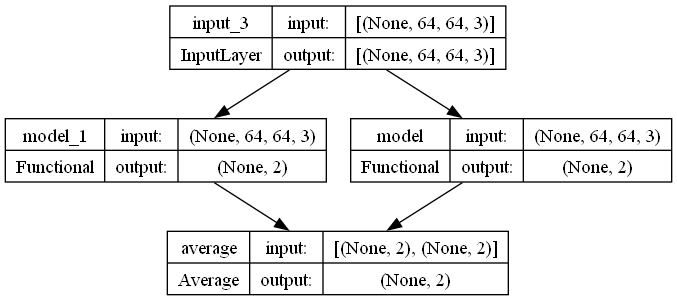

In [30]:
tf.keras.utils.plot_model(ensemble_model, 'model1.png', show_shapes= True)


In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
filepath=r"D:\Final Year Project\parkinsons_detection_ensemble1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=5)
callbacks_list = [checkpoint]

**Model Training**

In [33]:
hist = ensemble_model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 32,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/32
885/885 [==============================] - ETA: 0s - loss: 6.1200 - accuracy: 0.6038
Epoch 1: val_loss improved from inf to 3.34717, saving model to D:\Final Year Project\parkinsons_detection_ensemble1.hdf5


C:\Users\ANU\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


885/885 [==============================] - 462s 519ms/step - loss: 6.1200 - accuracy: 0.6038 - val_loss: 3.3472 - val_accuracy: 0.7996
Epoch 2/32
885/885 [==============================] - ETA: 0s - loss: 2.6205 - accuracy: 0.7212
Epoch 2: val_loss improved from 3.34717 to 1.98150, saving model to D:\Final Year Project\parkinsons_detection_ensemble1.hdf5
885/885 [==============================] - 460s 520ms/step - loss: 2.6205 - accuracy: 0.7212 - val_loss: 1.9815 - val_accuracy: 0.9192
Epoch 3/32
885/885 [==============================] - ETA: 0s - loss: 1.7302 - accuracy: 0.7111
Epoch 3: val_loss improved from 1.98150 to 1.12428, saving model to D:\Final Year Project\parkinsons_detection_ensemble1.hdf5
885/885 [==============================] - 457s 516ms/step - loss: 1.7302 - accuracy: 0.7111 - val_loss: 1.1243 - val_accuracy: 1.0000
Epoch 4/32
885/885 [==============================] - ETA: 0s - loss: 1.2253 - accuracy: 0.7676
Epoch 4: val_loss improved from 1.12428 to 1.01115, sav

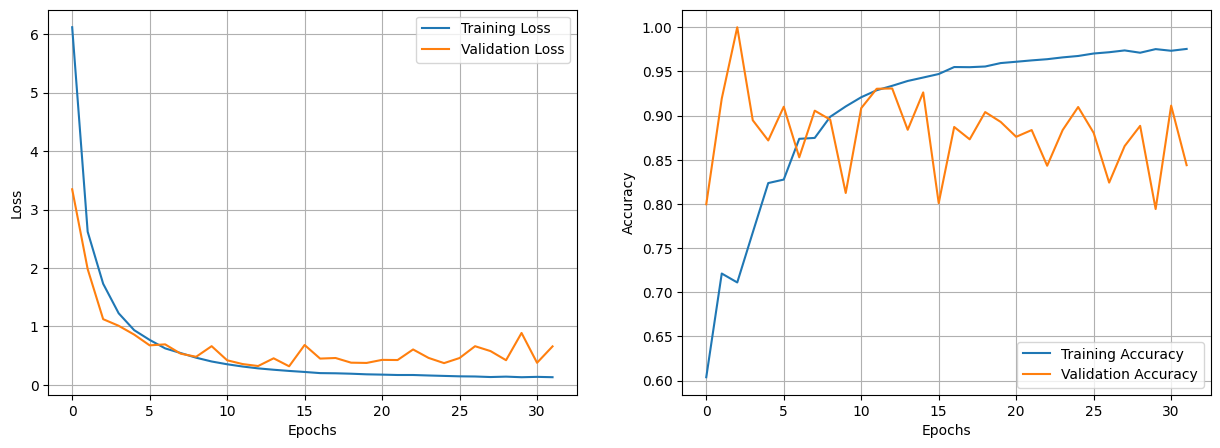

In [41]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [58]:
ensemble_model.save('PD_Detection.keras')

In [59]:
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.preprocessing import image

In [60]:
import numpy as np
import os

model= load_model(r'PD_Detection.keras')

def model_predict(img_path, model):

    img = image.load_img(img_path, target_size=(64,64))

    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)


    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="Control"
    else:
        preds="PD"
        
    return preds

In [61]:
a = model_predict(r'D:\Final Year Project\JPG Dataset\PD\17.jpg',model)

1/1 [==============================] - 1s 976ms/step


**Testing Ensemble Model**

In [62]:
test_images = "D:\Final Year Project\Test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'Control':0,
    'PD':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((64,64)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

'''
from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)



'''
from tensorflow.keras.utils import to_categorical


y_test = to_categorical(y_test)

# Print the shapes of x_test and y_test
print(x_test.shape, y_test.shape)

    

['Control', 'PD']
(73, 64, 64, 3) (73, 2)


In [63]:
ensemble_model.evaluate(x_test,y_test)

3/3 [==============================] - 1s 178ms/step - loss: 0.9867 - accuracy: 0.9315


[0.9867314100265503, 0.931506872177124]

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
predictions = ensemble_model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

3/3 [==============================] - 2s 216ms/step


In [66]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        37
           1       0.88      1.00      0.94        36

    accuracy                           0.93        73
   macro avg       0.94      0.93      0.93        73
weighted avg       0.94      0.93      0.93        73



In [67]:
print(confusion_matrix(test_labels, pred))

[[32  5]
 [ 0 36]]


In [68]:
ensemble_model.save('Parkinson disease.keras')